In [6]:
import numpy as np
import pandas as pd

In [22]:
df = pd.read_csv('/placement.csv')

In [23]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [25]:
df=df.iloc[:,1:]

In [26]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [28]:
import matplotlib.pyplot as plt

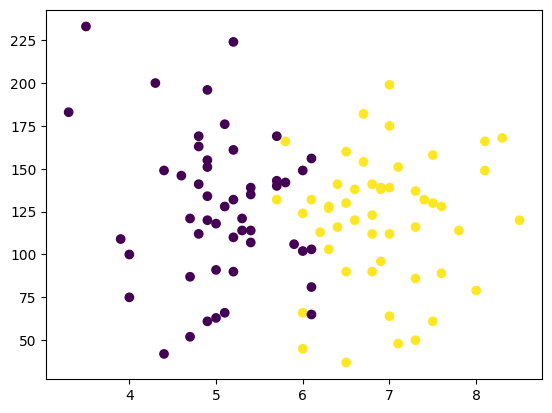

In [35]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [36]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [37]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [38]:
y


0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [39]:
y.shape

(100,)

In [47]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [49]:
X_train.shape

(90, 2)

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()

In [52]:
X_train = scaler.fit_transform(X_train)

In [53]:
X_train

array([[-8.28633285e-01, -1.55442919e+00],
       [ 4.72128267e-01,  1.50410391e-01],
       [-6.55198411e-01, -3.58496946e-01],
       [-8.28633285e-01, -1.54934012e-01],
       [-1.00206816e+00,  4.30309426e-01],
       [ 3.85410830e-01,  4.30309426e-01],
       [-1.78252509e+00, -3.83942313e-01],
       [ 2.11975957e-01, -2.82160846e-01],
       [ 1.59945495e+00, -2.56715479e-01],
       [ 3.85410830e-02, -2.26181039e-03],
       [-7.41915848e-01, -1.47809309e+00],
       [ 7.32280577e-01, -8.67404284e-01],
       [ 1.16586776e+00,  3.28527959e-01],
       [-1.34893791e-01,  1.06644360e+00],
       [-7.41915848e-01,  1.32089727e+00],
       [-9.15350722e-01, -1.04043278e-01],
       [-1.00206816e+00,  1.14277970e+00],
       [-6.55198411e-01, -8.67404284e-01],
       [-1.08878560e+00, -9.43740384e-01],
       [-2.21611227e-01,  2.01301124e-01],
       [-1.08878560e+00, -1.83432822e+00],
       [ 1.25258520e-01, -1.50353846e+00],
       [ 5.58845704e-01,  3.53973326e-01],
       [ 1.

In [54]:
X_test = scaler.transform(X_test)

In [55]:
X_test

array([[ 0.03854108, -1.47809309],
       [ 0.47212827,  0.9137714 ],
       [ 0.99243289, -1.93610969],
       [-0.48176354, -0.25671548],
       [ 1.33930264, -1.60531992],
       [ 0.12525852,  0.81198993],
       [ 1.16586776, -0.20582475],
       [ 0.99243289,  0.68476309],
       [-0.22161123,  1.1427797 ],
       [-1.34893791,  0.63387236]])

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
clf = LogisticRegression()

In [58]:
clf.fit(X_train,y_train)


LogisticRegression()

In [61]:
y_pred = clf.predict(X_test)

In [60]:
y_test

45    1
38    1
5     1
41    0
44    1
8     0
72    1
21    1
84    0
88    0
Name: placement, dtype: int64

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
accuracy_score(y_test,y_pred)

0.8

In [64]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

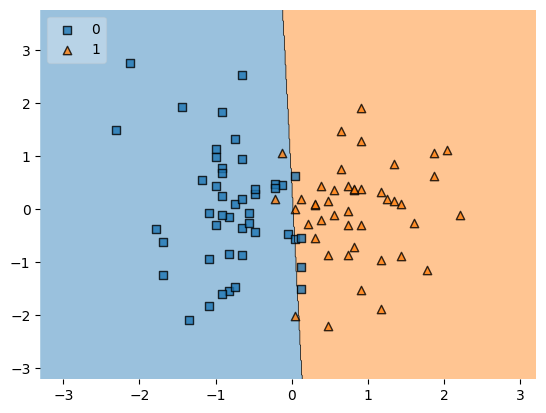

In [65]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [66]:
import pickle

In [67]:
pickle.dump(clf,open('model.pkl','wb'))
